# Imports

In [1]:
import yaml
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from os.path import isfile, join

# Helpers

In [2]:
bins = 200

In [41]:
def time_took(path, skiprows, usecols):
    t = np.loadtxt(path, skiprows=skiprows, usecols=usecols)
    
    # Assert we have same recordings (image and estimation)
    assert len(t[::12]) == len(t[1::12])
    
    print(f"PointCloud2 to PCL conversion (avg): {np.round(np.mean(t[2::18]), 7)}s. Max time is {np.round(np.max(t[2::18]), 7)}s\n")
    print(f"Transform point cloud to sensor frame (avg): {np.round(np.mean(t[5::18]), 7)}s. Max time is {np.round(np.max(t[5::18]), 7)}s\n")
    print(f"Remove Nans (avg): {np.round(np.mean(t[6::18]), 7)}s. Max time is {np.round(np.max(t[6::18]), 7)}s\n")
    print(f"Filter z axis (avg): {np.round(np.mean(t[7::18]), 7)}s. Max time is {np.round(np.max(t[7::18]), 7)}s\n")
    print(f"Transform in robot frame (avg): {np.round(np.mean(t[8::18]), 7)}s. Max time is {np.round(np.max(t[8::18]), 7)}s\n")
    print(f"Remove points outside of limits (avg): {np.round(np.mean(t[9::18]), 7)}s. Max time is {np.round(np.max(t[9::18]), 7)}s\n")
    print(f"Compute variances (avg): {np.round(np.mean(t[10::18]), 7)}s. Max time is {np.round(np.max(t[10::18]), 7)}s\n")
    print(f"Map location update from motion prediction (avg): {np.round(np.mean(t[13::18]), 7)}s. Max time is {np.round(np.max(t[13::18]), 7)}s\n")
    print(f"Raw map measurement integration (avg): {np.round(np.mean(t[15::18]), 7)}s. Max time is {np.round(np.max(t[15::18]), 7)}s\n")
    print(f"Point cloud callback (avg): {np.round(np.mean(t[17::18]), 7)}s. Max time is {np.round(np.max(t[17::18]), 7)}s\n")
        
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))
    fig.subplots_adjust(hspace = 1.5)
    #fig.tight_layout()

    ax[0][0].set_title(f'PointCloud2 to PCL conversion')
    ax[0][0].hist(t[2::18], bins, alpha = 0.5, color = 'c')
    ax[0][1].set_title(f'Transform point cloud to sensor frame')
    ax[0][1].hist(t[5::18], bins, alpha = 0.5, color = 'c')
    ax[1][0].set_title(f'Remove Nans')
    ax[1][0].hist(t[6::18], bins, alpha = 0.5, color = 'c')
    ax[1][1].set_title(f'Filter z axis')
    ax[1][1].hist(t[7::18], bins, alpha = 0.5, color = 'c')
    ax[2][0].set_title(f'Transform point cloud in robot frame')
    ax[2][0].hist(t[8::18], bins, alpha = 0.5, color = 'c')
    ax[2][1].set_title(f'Remove points outside of limits')
    ax[2][1].hist(t[8::18], bins, alpha = 0.5, color = 'c')
    ax[3][0].set_title(f'Compute variances')
    ax[3][0].hist(t[10::18], bins, alpha = 0.5, color = 'c')
    ax[3][1].set_title(f'Map location update from motion prediction')
    ax[3][1].hist(t[13::18], bins, alpha = 0.5, color = 'c')
    ax[4][0].set_title(f'Raw map measurement integration')
    ax[4][0].hist(t[15::18], bins, alpha = 0.5, color = 'c')
    ax[4][1].set_title(f'Point cloud callback')
    ax[4][1].hist(t[17::18], bins, alpha = 0.5, color = 'c')
    plt.show()

def read(file):
    with open(file, 'r') as stream:
        import yaml
        data = yaml.safe_load(stream)
        return data

def get_average_errors(path):
    # Get all files on path
    filenames = [f for f in listdir(path) if isfile(join(path, f))]
    
    # Compute average translation and rotation
    count = 0
    average_rotation = []
    average_translation = []

    for filename in filenames:
        if "relative" not in filename:
            continue

        print(f"Processed {filename}")

        count += 1

        # Get full path to file
        full_path = path + filename

        # Read yaml
        data = read(full_path)

        # Populate lists
        average_translation.append(data["trans_perc"]["mean"])
        average_rotation.append(data["rot_deg_per_m"]["mean"])
    
    return (sum(average_rotation)/count, sum(average_translation)/count) 

# Elevation Mapping

- Resolution: 0.04
- Grid Size: 7 x 7
- No voxel filtering

PointCloud2 to PCL conversion (avg): 0.0080588s. Max time is 0.0115387s

Transform point cloud to sensor frame (avg): 0.0055216s. Max time is 0.0079019s

Remove Nans (avg): 0.0051528s. Max time is 0.0078224s

Filter z axis (avg): 0.0017282s. Max time is 0.0030877s

Transform in robot frame (avg): 0.0011866s. Max time is 0.0024393s

Remove points outside of limits (avg): 0.0025262s. Max time is 0.0042029s

Compute variances (avg): 0.0186413s. Max time is 0.029812s

Map location update from motion prediction (avg): 0.0005116s. Max time is 0.00088s

Raw map measurement integration (avg): 0.0044166s. Max time is 0.008576s

Point cloud callback (avg): 0.0482705s. Max time is 0.062142s



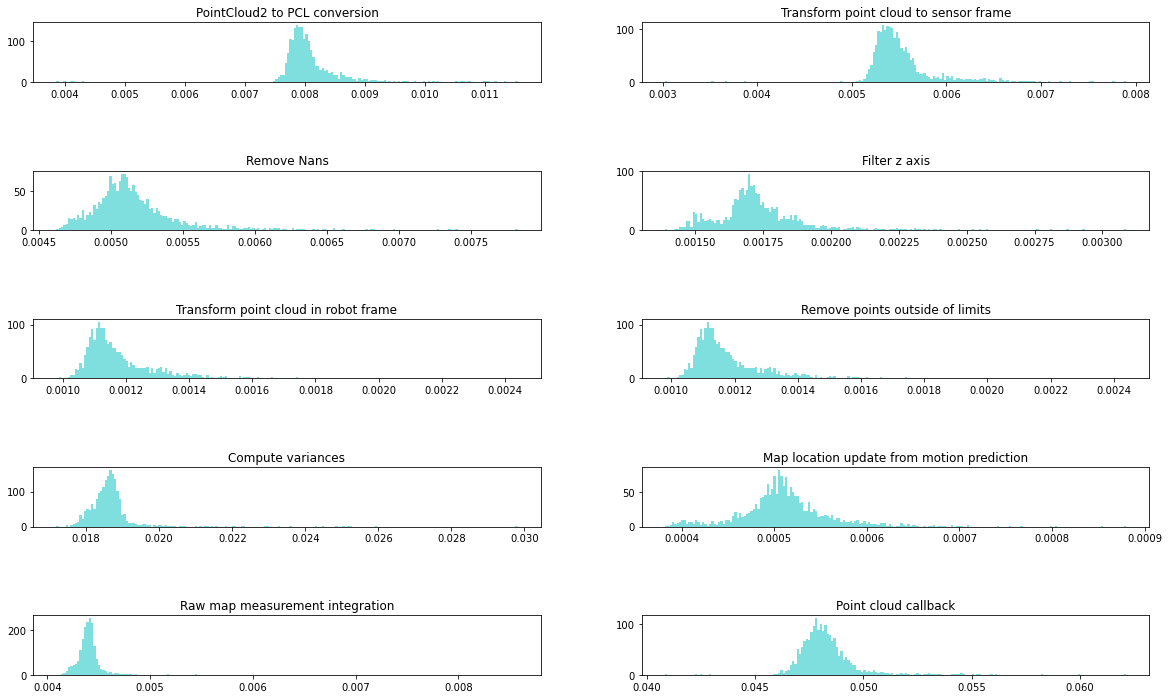

In [42]:
time_took("./data/map_0.04_7x7_no_voxel_no_speedup.log", skiprows=0, usecols=(0))

![alt text](./images/in_fw_3_jetson_c.png)